In [1]:
%load_ext griblib.jupyter

from pathlib import Path
from datetime import datetime, timedelta

import numpy as np
import pandas as pd
from numpy.typing import NDArray

import dask
import xarray as xr

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.gridliner import Gridliner

DATA = Path.cwd().parent / "data"
PS_STORE = DATA / "PROBSEVERE"
GMGSI_STORE = DATA / "GMGSI"
ONE_HOUR = "1H"
SWP = [
    "CAPE_M10M30",
    "EBSHEAR",
    "FLASH_DENSITY",
    "FLASH_RATE",
    "LJA",
    "MAXLLAZ",
    "MEANWIND_1-3kmAGL",
    "MESH",
    "MLCAPE",
    "MLCIN",
    "MOTION_EAST",
    "MOTION_SOUTH",
    "MUCAPE",
    "P98LLAZ",
    "P98MLAZ",
    "PS",
    "PWAT",
    "SIZE",
    "SRH01KM",
    "VIL_DENSITY",
    "WETBULB_0C_HGT",
]
DIMENSIONS = ["time", "lat", "lon"]
TIME, LAT, LON = DIMENSIONS
idx = pd.IndexSlice


    len(times.unique())=5,090
    times.min()=Timestamp('2022-03-01 00:00:00')
    times.max()=Timestamp('2022-09-30 23:00:00')
    

    len(times.unique())=152,553
    times.min()=Timestamp('2022-03-01 00:00:29')
    times.max()=Timestamp('2022-09-30 23:58:41')
    


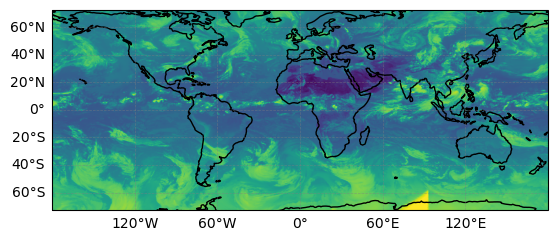

In [2]:
MRMS_BOUNDS = (-135, -70, 20, 60)
W, E, S, N = MRMS_BOUNDS
ref_time = datetime.fromisoformat("2022-07-01T12:00:00")


def mask_time(ds: xr.Dataset) -> xr.Dataset:
    times = pd.to_datetime(ds[TIME].to_numpy())
    print(
        f"""
    {len(times.unique())=:,}
    {times.min()=}
    {times.max()=}
    """
    )
    mask = (
        (times.year == ref_time.year)
        & (times.month == ref_time.month)
        & (times.day == ref_time.day)
        & (times.hour >= 12)
        & (times.hour <= 18)
    )
    return ds.sel({TIME: mask})


def geoaxes(projection=ccrs.PlateCarree()) -> tuple[GeoAxes, Gridliner]:
    ax: GeoAxes = plt.axes(
        projection=projection,
    )
    gl = ax.gridlines(crs=projection, draw_labels=True, linewidth=0.5, color="gray", alpha=0.5, linestyle="--")
    gl.top_labels = False
    gl.right_labels = False
    ax.coastlines(resolution="auto")
    return ax, gl


# open the gmgsi dataset
longwave_ir = mask_time(xr.open_zarr(GMGSI_STORE))
ax, gl = geoaxes()
# select a single parameter and time
longwave_ir_global = longwave_ir["GMGSI_LW"].sel({TIME: np.datetime64(ref_time)})
# define the extent
global_extent = np.array(
    [(longwave_ir_global[crd].min(), longwave_ir_global[crd].max()) for crd in (LON, LAT)]
).flatten()
# plot the image
ax.imshow(longwave_ir_global, extent=global_extent, transform=ccrs.PlateCarree())
# fit the gmgsi dataset into the bounds of the MRMS
longwave_ir = longwave_ir.sel(
    {
        LAT: (longwave_ir.lat > S) & (longwave_ir.lat < N),
        LON: (longwave_ir.lon > W) & (longwave_ir.lon < E),
    }
)
probsevere = mask_time(xr.open_zarr(PS_STORE))
# open the probsevere dataset

CAPE_M10M30    EBSHEAR  \
time                lat       lon                                  
2022-07-01 12:00:00 24.427605 -82.860306        699.0  19.299999   
                              -80.195969        642.0   9.000000   
                    25.081528 -83.652405        614.0  19.100000   
                    25.277023 -82.500259        733.0  13.200000   
                    25.537201 -82.716286        682.0  13.400000   
...                                               ...        ...   
2022-07-01 18:00:00 59.968628 -70.330742          NaN        NaN   
                              -70.258736          NaN        NaN   
                              -70.186729          NaN        NaN   
                              -70.114716          NaN        NaN   
                              -70.042709          NaN        NaN   

                                          FLASH_DENSITY  FLASH_RATE        ID  \
time                lat       lon                                               
2022-07-01 12:00:00 24.427605 -82.860306            0.0         0.0  120984.0   
                              -80.195969            0.0         0.0  121168.0   
                    25.081528 -83.652405            0.0         0.0  121219.0   
                    25.277023 -82.500259            0.0         0.0  121218.0   
                    25.537201 -82.716286            0.0         0.0  121123.0   
...                                                 ...         ...       ...   
2022-07-01 18:00:00 59.968628 -70.330742            NaN         NaN       NaN   
                              -70.258736            NaN         NaN       NaN   
                              -70.186729            NaN         NaN       NaN   
                              -70.114716            NaN         NaN       NaN   
                              -70.042709            NaN         NaN       NaN   

                                          LJA  MAXLLAZ  MEANWIND_1-3kmAGL  \
time                lat       lon                                           
2022-07-01 12:00:00 24.427605 -82.860306  0.0   0.0010              16.00   
                              -80.195969  0.0   0.0005              14.40   
                    25.081528 -83.652405  0.0   0.0010              13.80   
                    25.277023 -82.500259  0.0   0.0000              14.00   
                    25.537201 -82.716286  0.0   0.0010              13.35   
...                                       ...      ...                ...   
2022-07-01 18:00:00 59.968628 -70.330742  NaN      NaN                NaN   
                              -70.258736  NaN      NaN                NaN   
                              -70.186729  NaN      NaN                NaN   
                              -70.114716  NaN      NaN                NaN   
                              -70.042709  NaN      NaN                NaN   

                                           MESH  MLCAPE  ...  MUCAPE  P98LLAZ  \
time                lat       lon                        ...                    
2022-07-01 12:00:00 24.427605 -82.860306  0.000  2524.0  ...  3160.0   0.0010   
                              -80.195969  0.000  2435.5  ...  3096.0   0.0005   
                    25.081528 -83.652405  0.000  2168.0  ...  3005.0   0.0010   
                    25.277023 -82.500259  0.000  2779.0  ...  3453.0   0.0000   
                    25.537201 -82.716286  0.025  2615.0  ...  3111.0   0.0010   
...                                         ...     ...  ...     ...      ...   
2022-07-01 18:00:00 59.968628 -70.330742    NaN     NaN  ...     NaN      NaN   
                              -70.258736    NaN     NaN  ...     NaN      NaN   
                              -70.186729    NaN     NaN  ...     NaN      NaN   
                              -70.114716    NaN     NaN  ...     NaN      NaN   
                              -70.042709    NaN     NaN  ...     NaN      NaN   

                                          P98ML

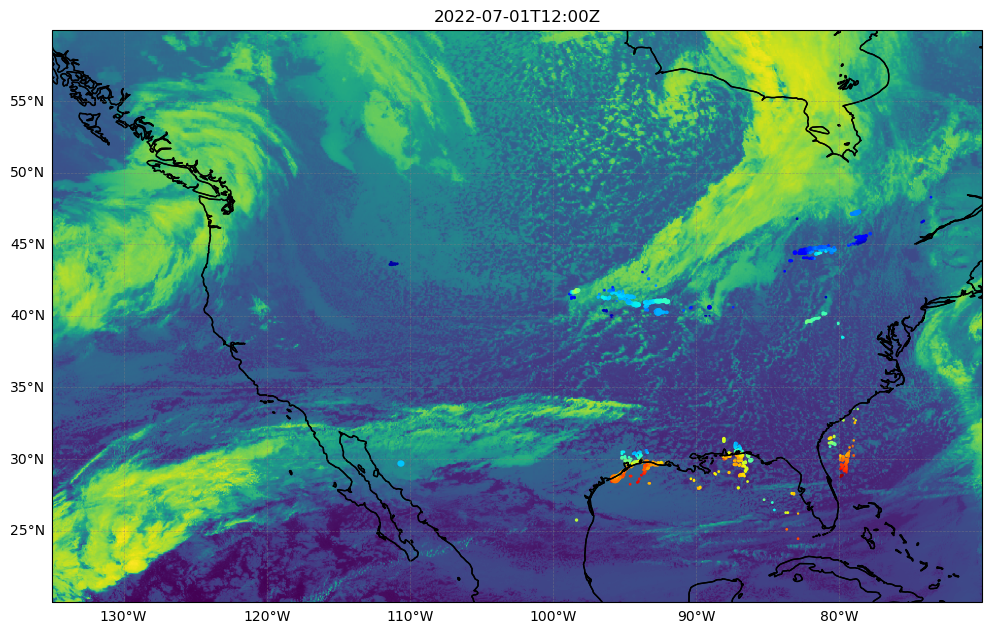

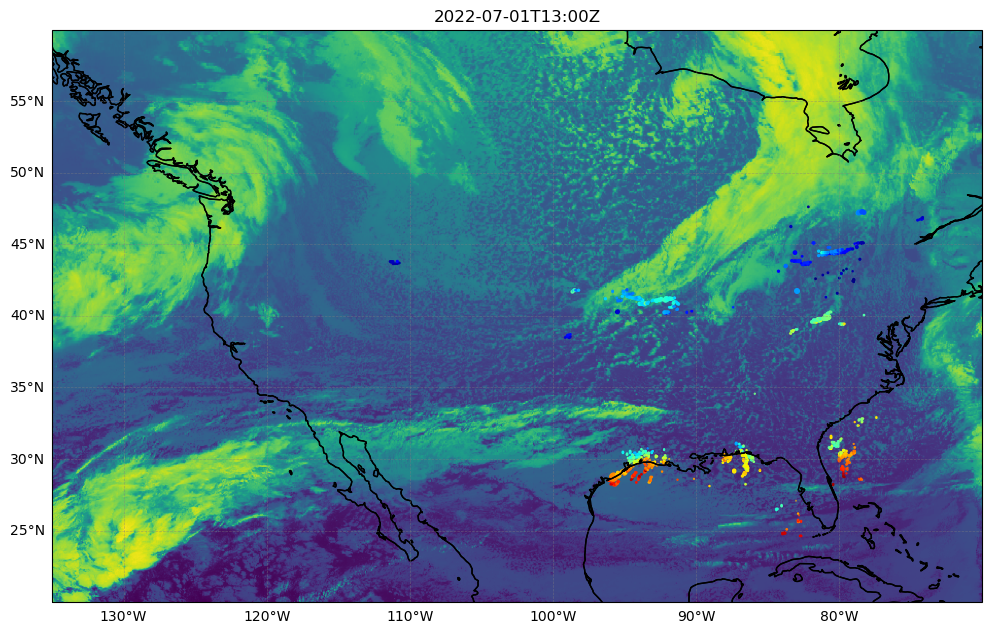

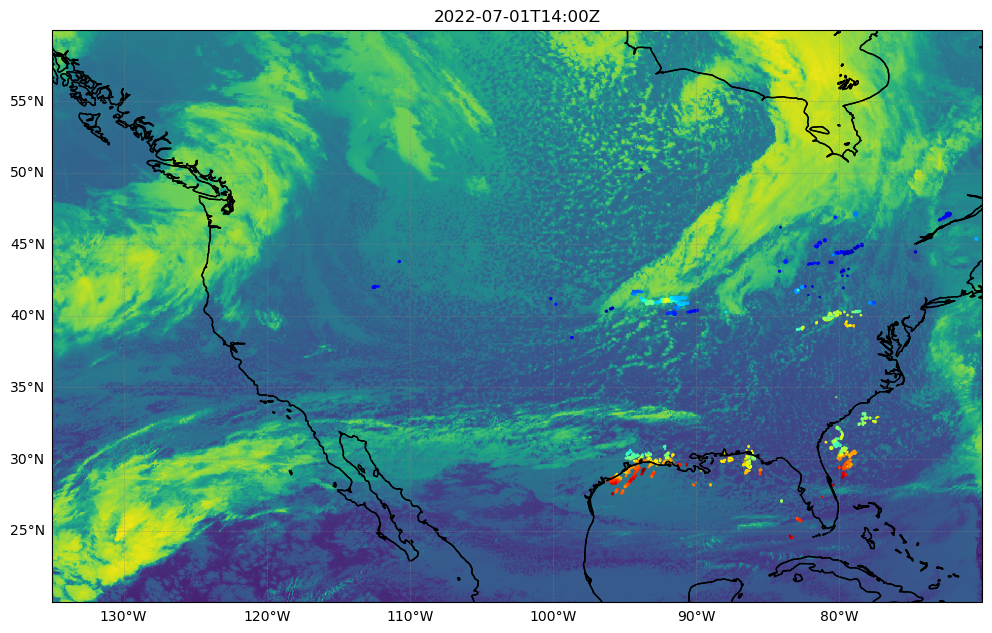

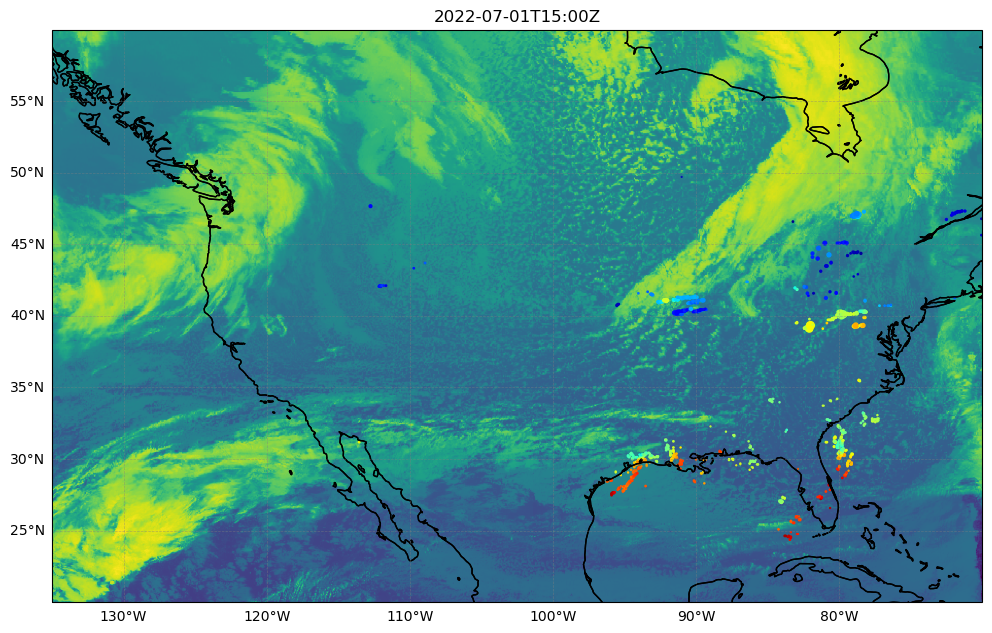

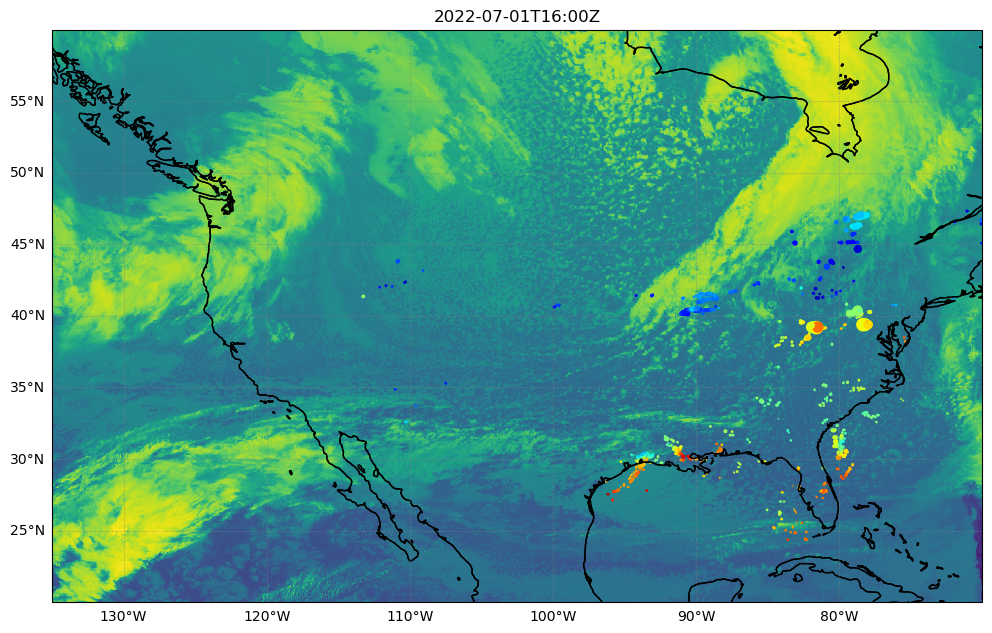

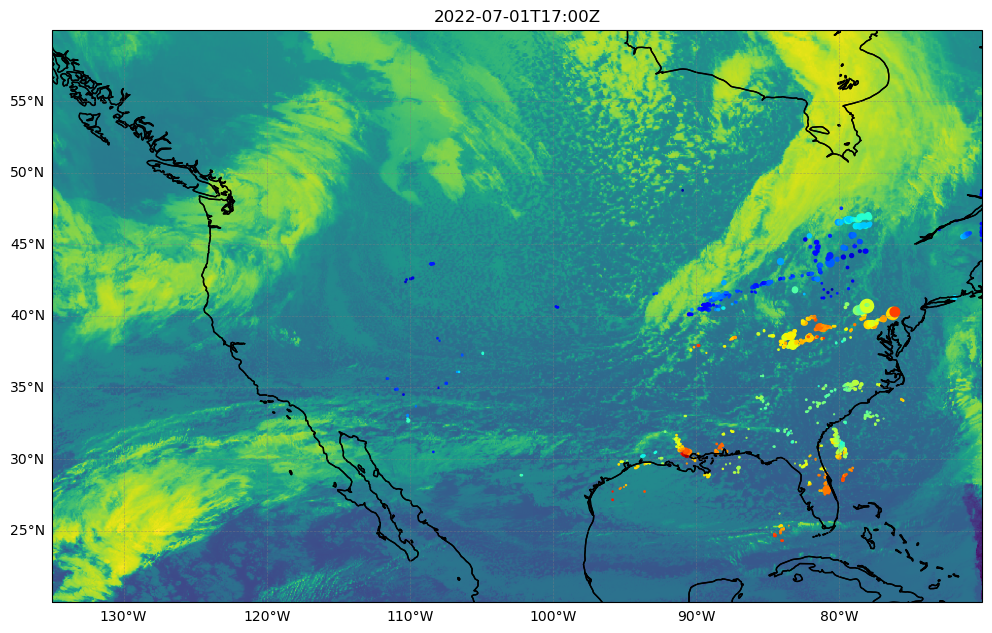

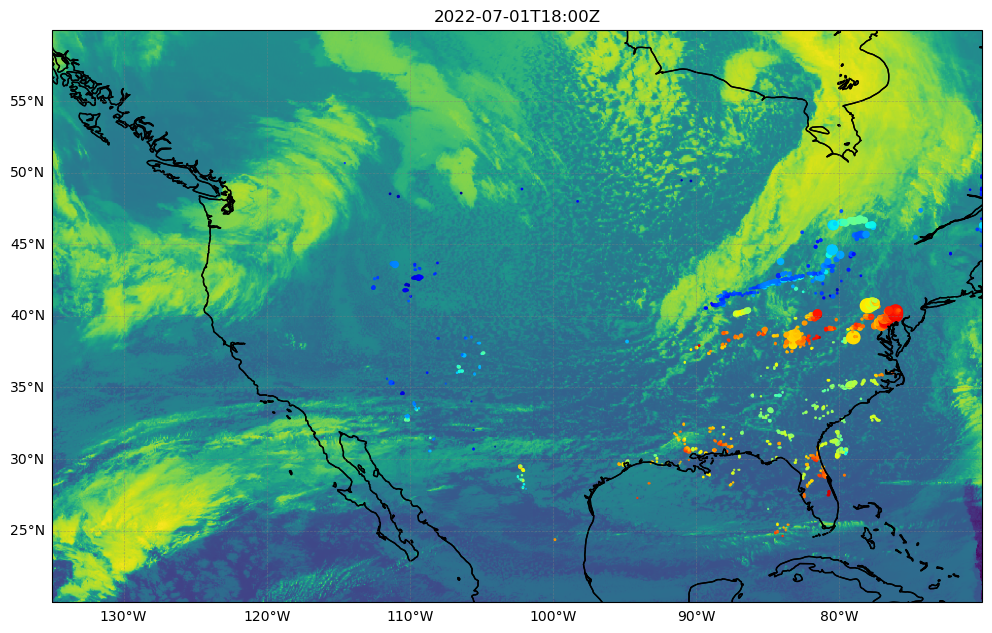

In [3]:
from typing import TypeVar
from numpy.typing import DTypeLike


def index_min(target: NDArray[np.floating], values: NDArray[np.floating], axis: int = 0) -> NDArray[np.floating]:
    diff = target[:, np.newaxis] - values
    result = target[abs(diff).argmin(axis=axis)]
    return result


#
lw_ir = longwave_ir.to_dataframe()
lat, lon = (lw_ir.index.unique(key).to_numpy() for key in (LAT, LON))
# convert the xarray dataset to a pandas dataframe
ps = probsevere.to_dataframe()
ps[LAT] = index_min(lat, ps["X"].to_numpy())
ps[LON] = index_min(lon, ps["Y"].to_numpy())
ps = (
    ps.reset_index()
    .drop(columns=["X", "Y", "MINX", "MINY", "MAXX", "MAXY"])
    .groupby([pd.Grouper(key=TIME, freq=ONE_HOUR, origin="epoch"), LAT, LON])
    .mean()
)

df2 = ps.merge(lw_ir, how="outer", left_on=DIMENSIONS, right_on=DIMENSIONS)


for label, frame in df2.groupby("time"):
    fig = plt.figure(label.timestamp(), figsize=(12, 18))
    ax, gl = geoaxes()

    ax.set_title(label.strftime("%Y-%m-%dT%H:%MZ"))
    ax.coastlines(resolution="auto")
    ax.imshow(frame["GMGSI_LW"].unstack(LON), extent=MRMS_BOUNDS, origin="lower", transform=ccrs.PlateCarree())
    frame.reset_index().plot.scatter(
        x=LON,
        y=LAT,
        c="MUCAPE",
        cmap="jet",
        ax=ax,
        fig=fig,
        s="PS",
        transform=ccrs.PlateCarree(),
        colorbar=False,
    )
df2

Index(['CAPE_M10M30', 'EBSHEAR', 'FLASH_DENSITY', 'FLASH_RATE', 'ID', 'LJA',
       'MAXLLAZ', 'MEANWIND_1-3kmAGL', 'MESH', 'MLCAPE', 'MLCIN',
       'MOTION_EAST', 'MOTION_SOUTH', 'MUCAPE', 'P98LLAZ', 'P98MLAZ', 'PS',
       'PWAT', 'SIZE', 'SRH01KM', 'VIL_DENSITY', 'WETBULB_0C_HGT', 'GMGSI_LW'],
      dtype='object')

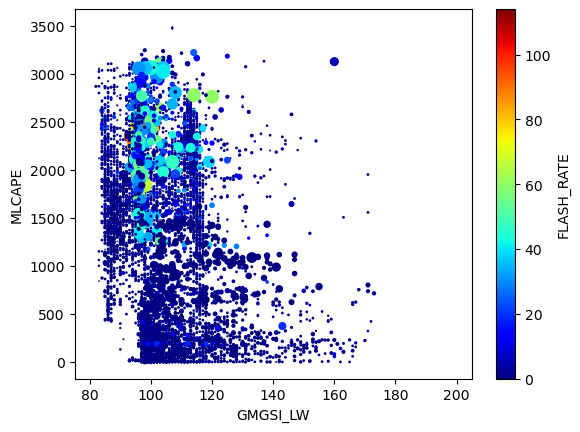

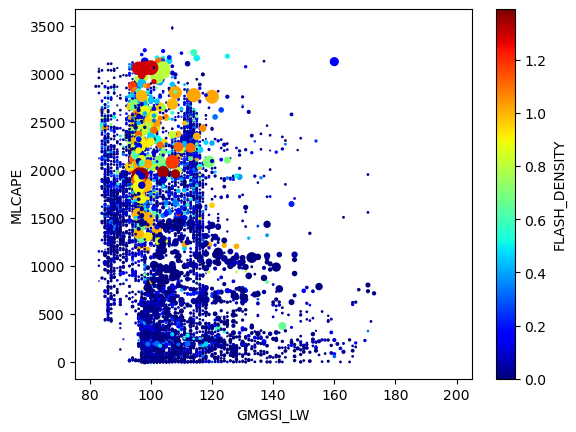

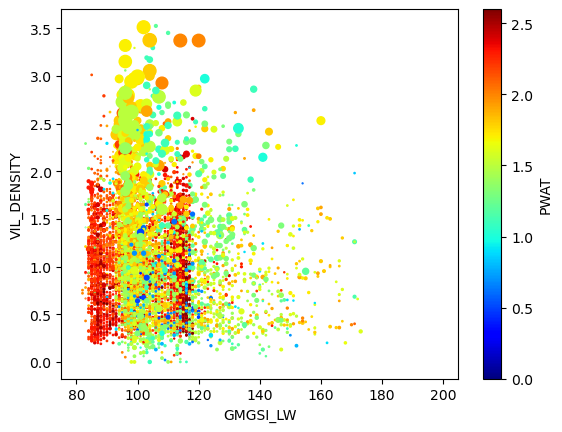

In [4]:
with_ps = df2.loc[df2.notna().all(axis=1), :]
with_ps.plot.scatter("GMGSI_LW", "MLCAPE", c="FLASH_RATE", s="PS", cmap="jet")
with_ps.plot.scatter("GMGSI_LW", "MLCAPE", c="FLASH_DENSITY", s="PS", cmap="jet")
with_ps.plot.scatter("GMGSI_LW", "VIL_DENSITY", c="PWAT", s="PS", cmap="jet")
with_ps.columns

<AxesSubplot: xlabel='GMGSI_LW', ylabel='VIL_DENSITY'>

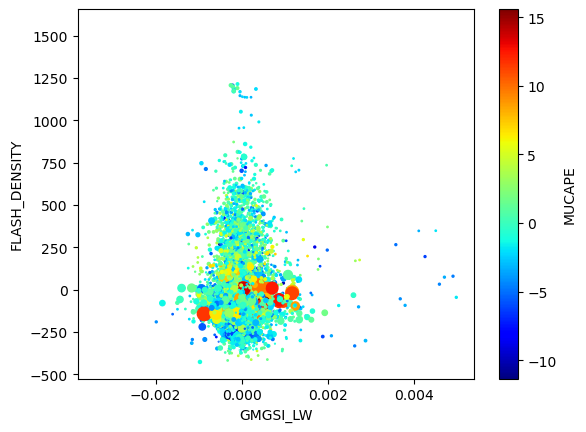

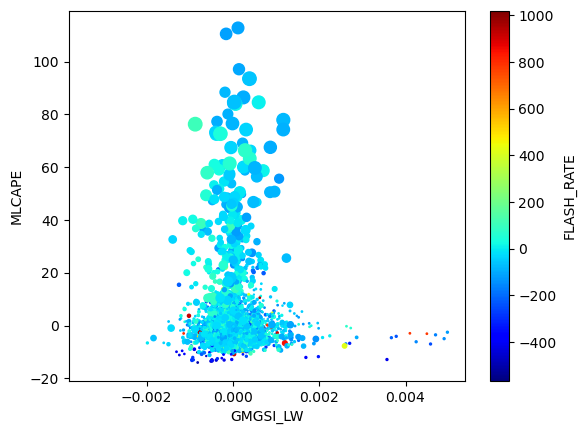

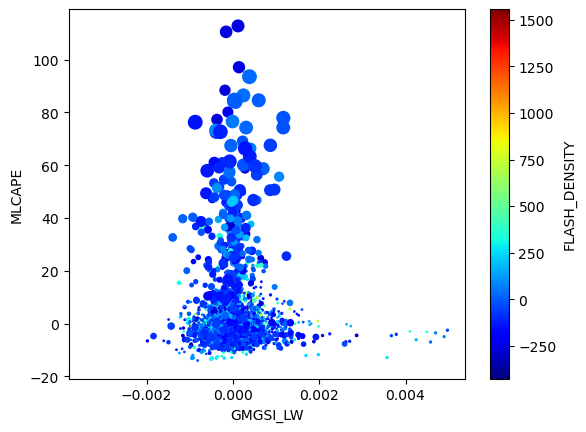

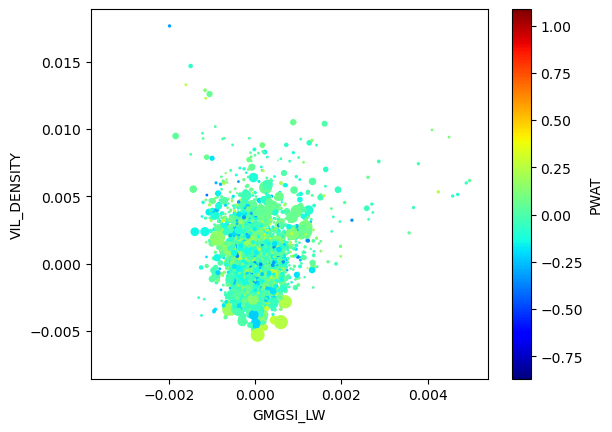

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(df2.columns))
df3 = pd.DataFrame(pca.fit_transform(with_ps, df2), columns=df2.columns)
df3.plot.scatter("GMGSI_LW", "FLASH_DENSITY", c="MUCAPE", s=with_ps["PS"], cmap="jet")
df3.plot.scatter("GMGSI_LW", "MLCAPE", c="FLASH_RATE", s=with_ps["PS"], cmap="jet")
df3.plot.scatter("GMGSI_LW", "MLCAPE", c="FLASH_DENSITY", s=with_ps["PS"], cmap="jet")
df3.plot.scatter("GMGSI_LW", "VIL_DENSITY", c="PWAT", s=with_ps["PS"], cmap="jet")